__Final Project__

In [1]:
import operator
import pandas as pd
import numpy as np
import time
import math
import requests 
import seaborn as sns
import matplotlib.pyplot as plt


In [124]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [29]:
source = 'https://api.fda.gov/drug/event.json?'
def fdaSearch(source): 
    fullSearch = source
    drug = requests.get(fullSearch)
    results = drug.json()['results']
    drugDF = pd.DataFrame(results)
    return drugDF


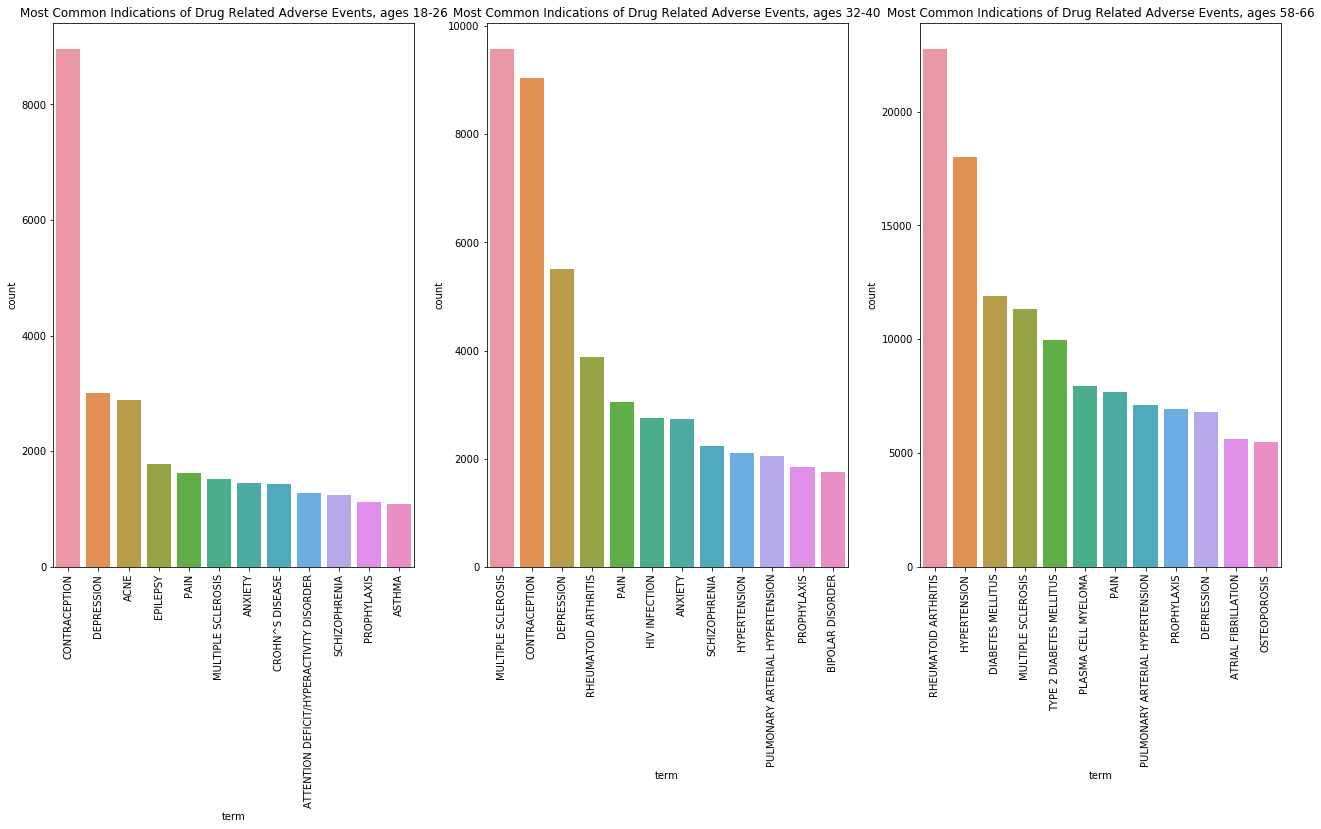

In [259]:
#Drug Indications for young adults aged 17 to 25 that resulted in serious complications
youngBadIndication = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[15+TO+24]&count=patient.drug.drugindication.exact')
youngBadIndicationCount = youngBadIndication.head(n=13)
#Drop PRODUCT USED FOR UNKNOWN INDICATION --> first row
youngBadIndicationCount=youngBadIndicationCount.iloc[1:13]
#Drug Indications for young adults aged 32 to 40 that resulted in serious complications
middleBadIndication = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[32+TO+40]&count=patient.drug.drugindication.exact')
middleBadIndicationCount = middleBadIndication.head(n=13)
middleBadIndicationCount=middleBadIndicationCount.iloc[1:13]
#Drug Indications for young adults aged 58 to 66 that resulted in serious complications
seniorBadIndication = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[58+TO+66]&count=patient.drug.drugindication.exact')
seniorBadIndicationCount = seniorBadIndication.head(n=13)
seniorBadIndicationCount = seniorBadIndicationCount.iloc[1:13]


fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize = (22,10))
ax1 = sns.barplot(x = 'term', y = 'count',data = youngBadIndicationCount,ax = ax1)
ax1.set_xticklabels = ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set = ax1.set(title = "Most Common Indications of Drug Related Adverse Events, ages 18-26")

ax2 = sns.barplot(x = 'term', y = 'count',data = middleBadIndicationCount, ax = ax2)
ax2.set_xticklabels = ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90) 
ax2.set = ax2.set(title = "Most Common Indications of Drug Related Adverse Events, ages 32-40")

ax3 = sns.barplot(x = 'term', y = 'count',data = seniorBadIndicationCount, ax=ax3)
ax3.set_xticklabels = ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90) 
ax3.set=ax3.set(title = "Most Common Indications of Drug Related Adverse Events, ages 58-66")


    The above barplots show most common indications that resulted in serious drug related adverse events by three ages groups: 18-26, 32-40, and 58-66. These age groups, intervals of 8 years, are useful in reflecting differences in drug usage because it gives a representative overview of how usage changes. Each interval accurately reflects very distinct points in a given patients life and associated medical barriers. Serious outcomes are defined by the FDA as follows: "The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition"
    
    We chose to only look at data from 2010 and on. The count variable clearly shows that the largest age group of 58-66 has the largest drug usage, which makes sense. As we age we increase our dependencies on pharmaceutical drugs to treat increasingly common disorders and alleviate associated symptoms. As we iterate through each age group, drug usage increases. 
    
    Observing the distribution of indicators for the youngest age group, we see that contraception is by far the most common indication for serious drug reactions. Contraception is also the most common indicator for drugs total amongst this age group so that is not suprisingly. It is intersting, as generally only females will be prescribed birth control at this age so the fact it has a count of nearly 9000 and the next most common indicator, depression, is at 3000 shows that pharmaceutical drug use is not abundant compared to the other ages.

    When subsetting by age group, we can see some interesting trends that reflect greatly upon the causes for pharmaceutical drug usage amongst that particular group. The most common indication for the youngest age group is unsurprsingly contraception, followed by depression, and acne. These are all customary issues than young adults face, and the drugs used in treating them have caused the most severe outcomes.  The indication that the youngest age group faces that the other groups do not is in treating ADHD. Either the treatment of ADHD is most common in the youngest age groups, or they are the most prone to negative outcomes associated with the drugs prescribed. Pain is the commonality across all age groups, predictably. Across the first two age groups, anxiety is the 7th most common indication that resulted in some drug related adverse event. When moving on to the oldest group, anxiety does not appear among the top 12 indicators. Depression is 2nd in indications for the youngest group, moving down to 3rd in te second group, and 10th in the oldest group. Ages 32-40 showed a particularly high amount of adverse events for the indication of multiple sclerosis, overtaking contraception. HIV and rheumatoid arthiritis also appear at this age interval, which reflect new challenges that this age group faces. The highest age group moves away from mental disorders and behavioral disorders and common drug indicators of adverse events, instead moving to rather serious medical conditions such as hypertension, arthirits, diabetes, meloma, and osteoporosis. 

In [188]:
#overall frequent brand drug names that caused serious complications in all age grouos (ibuprofen)
youngBadGenericDrug = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1&count=patient.drug.openfda.brand_name.exact')
#most frequent Brand drug names that caused serious complications in people aged 18-26
youngBadGenericDrug = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[17+TO+25]&count=patient.drug.openfda.brand_name.exact')
youngBadGenericDrug= youngBadGenericDrug.head(n = 12)
#most frequent Brand drug names that caused serious complications in people aged 32 to 40
middleBadGenericDrug= fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[32+TO+40]&count=patient.drug.openfda.brand_name.exact')
middleBadGenericDrug = middleBadGenericDrug.head(n=12)
#most frequent Brand drug names that caused serious complications in people aged 58 to 66
seniorBadGenericDrug= fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[58+TO+66]&count=patient.drug.openfda.brand_name.exact')
seniorBadGenericDrug = seniorBadGenericDrug.head(n=12)

display_side_by_side(youngBadGenericDrug,middleBadGenericDrug,seniorBadGenericDrug)




,count,term
0,5534,YAZ
1,5245,MIRENA
2,4576,YASMIN
3,4106,PAIN RELIEF
4,3068,MOTRIN INFANTS
5,2885,ADVIL
6,2744,ADVIL LIQUI-GELS
7,2713,CHILDRENS MOTRIN
8,2678,MOTRIN IB
9,2678,CHILDRENS ADVIL


The above dataframes display most common drugs, in terms of brand name, that resulted in serious complications, again split by the above three age groups. Yaz is a common birth control medication which records high counts amongst the first two age groups. Mirena is also a birth control device, which caused high frequencies of serious complications. In the youngest age group, pain relief and non steroidal anti inflammatories (such as ibuprofen,advil,aspirin etc.) caused the majority of complications. Clearly blood thinners, fever reducers, and anti inflammatories are dangerous medications when abused or overused, and compile the vast majority of adverse event reports to the FDA. The dangers of these drugs are well documented. Xanax is a common drug in the midle age group that resulted in adverse events, which is not surprisingly considering the risk of abuse or addiction for anti anxiety medications. Enbrel is used to treat arthiritis and seems to be a particularly dangrous drug.

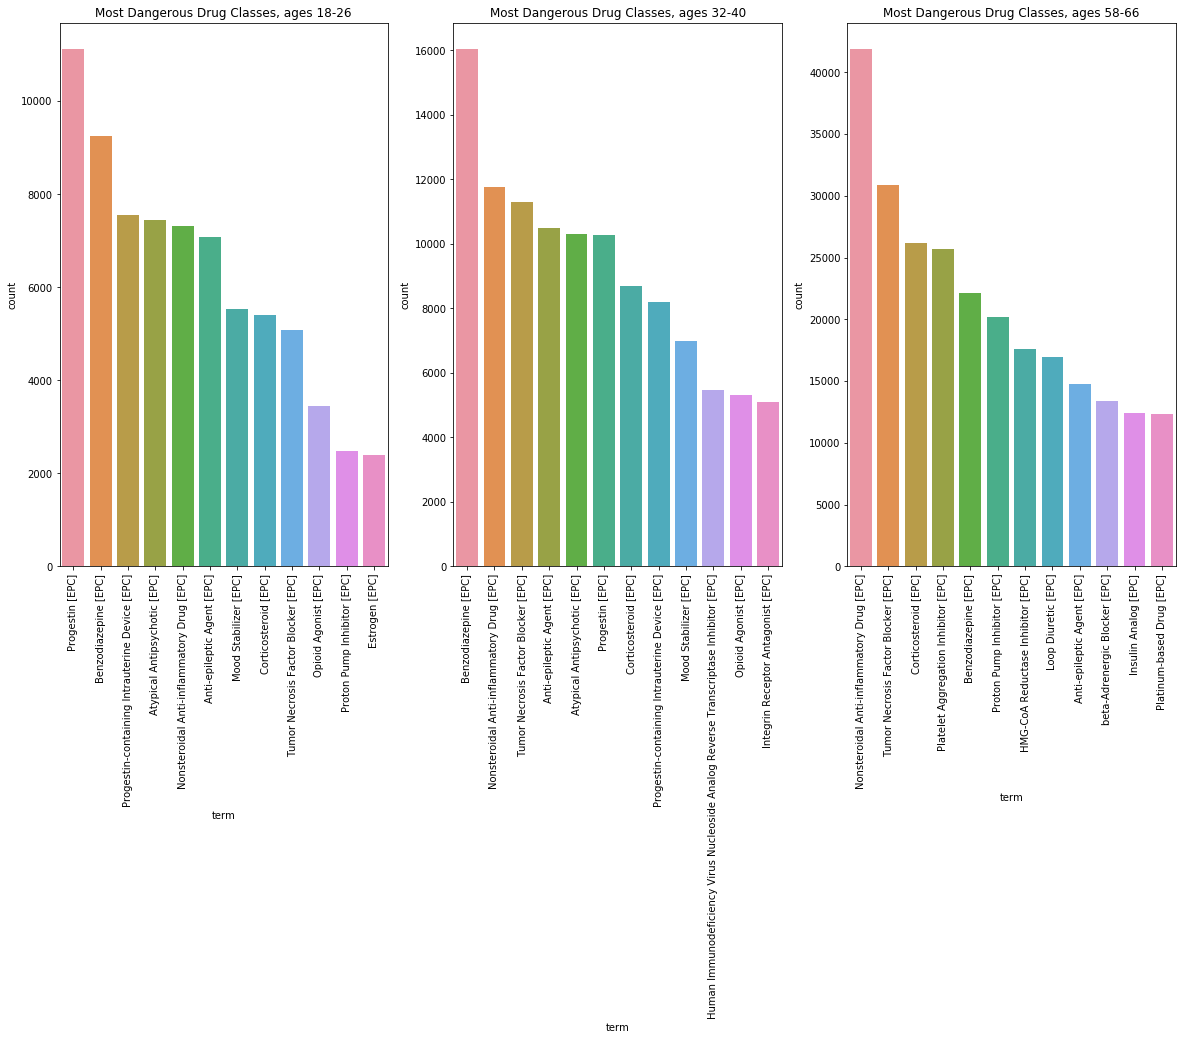

In [192]:
#Dangerous Drug Classes for young adults aged 18 to 26
youngDangClasses = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[18+TO+26]&count=patient.drug.openfda.pharm_class_epc.exact')
youngDangClasses = youngDangClasses.head(n=12)                             
#Dangerous Drug Classes for young adults aged 32 to 40
middleDangClasses = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[32+TO+40]&count=patient.drug.openfda.pharm_class_epc.exact')
middleDangClasses = middleDangClasses.head(n=12)  
#Dangerous Drug Classes for young adults aged 58 to 66
seniorDangClasses = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20180316]+AND+serious:1+AND+patient.patientonsetage:[58+TO+66]&count=patient.drug.openfda.pharm_class_epc.exact')
seniorDangClasses = seniorDangClasses.head(n=12)

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize = (20,10))
ax1 = sns.barplot(x = 'term', y = 'count',data = youngDangClasses,ax = ax1)
ax1.set_xticklabels = ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set = ax1.set(title = "Most Dangerous Drug Classes, ages 18-26")

ax2 = sns.barplot(x = 'term', y = 'count',data = middleDangClasses, ax = ax2)
ax2.set_xticklabels = ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90) 
ax2.set = ax2.set(title = "Most Dangerous Drug Classes, ages 32-40")

ax3 = sns.barplot(x = 'term', y = 'count',data = seniorDangClasses, ax=ax3)
ax3.set_xticklabels = ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90) 
ax3.set=ax3.set(title = "Most Dangerous Drug Classes, ages 58-66")
                             
                             
                             
                             

The above barcharts show another perspective on the adverse drug event data. They display most abused or dangerous drug classes amongst the three age groups. This is imported information to analyze because it can point to classes of drugs that probably should be prescribed less, or taken with more caution amongst each age group. The class of progestin is that of birth control and is consistent with the rest of the collected data. Benzodiaepines, a class of drugs used as anti anxiety medication, are clearly an extremely dangerous class of drugs. An interesting class reported for the youngest group is "Atypical Antipsychotics", which are defined as major tranquilizers used to treat psychotic disorders. Mood stabilizers, such as antidepressants, are very problematic and it shows that treatments associated with mental or behavioral disorders are quite suspicious in terms of their effects on the younger age groups. Severe outcomes associated with antiinflammatory drugs jumps above 40,000 occurances at the oldest age group, suggesting that the older age groups are more at risk when using such drugs.

In [272]:
reportPharmCount

,count,term
0,932290,Mylan Pharmaceuticals Inc.
1,785855,"Actavis Pharma, Inc."
2,739500,Aurobindo Pharma Limited
3,651516,Zydus Pharmaceuticals (USA) Inc.
4,641520,Sandoz Inc
5,633459,"Teva Pharmaceuticals USA, Inc."
6,627231,Cadila Healthcare Limited


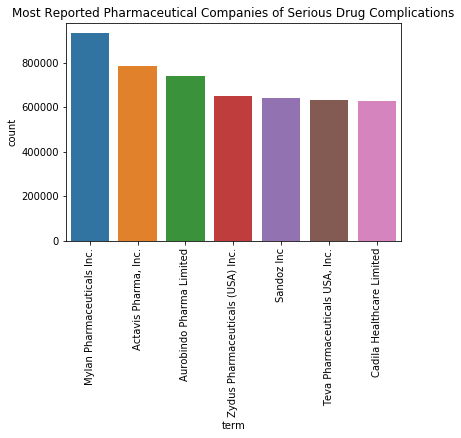

In [271]:
reportPharm = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+serious:1&count=patient.drug.openfda.manufacturer_name.exact')
reportPharmCount = reportPharm.head(n = 7)
dangPharm = sns.barplot(x = 'term', y = 'count',data = reportPharmCount)
dangPharm.set_xticklabels = dangPharm.set_xticklabels(dangPharm.get_xticklabels(),rotation=90) 
dangPharm.set=dangPharm.set(title = "Most Reported Pharmaceutical Companies of Serious Drug Complications")






The above barchart shows the most reported Pharmaceutical Companies in terms of serious complications reported. This chart does not necessarily account for the size of these companies, so if one company has an extremely large market share relative to the other companies that may explain higher appearances on the FDA databases. In order to remedy this potential bias, we researched largest generic drug companies. From the image below displaying the largest generic drug companies by revenue in 2016, we see that Mylan, which by far has the most adverse drug reports reported since 2010, is the second largest company. Teva, the top company by earnings, is ranked 6th, with nearly 300,000 more cases reported. This suggests that Mylan is producing drugs that result in adverse results at a much higher rate than companies of similar sizes.

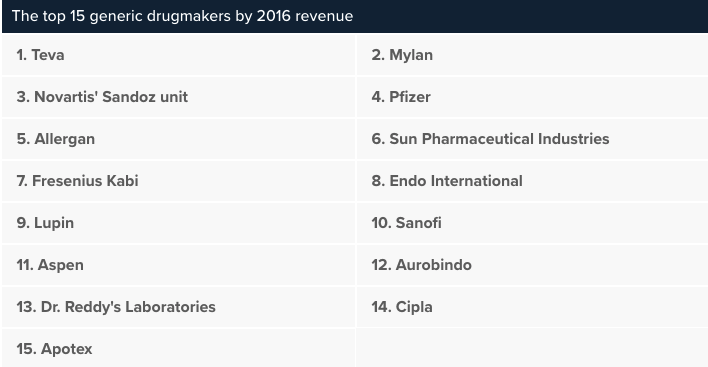

In [270]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/skyenadel/Desktop/drugPic.png"
pic = Image(filename = PATH,width=600, height=600)
pic

In [277]:
import warnings
warnings.simplefilter('ignore')
#Benzo
benzo = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==benzodiazepine&count=serious')
benzo.iloc[0,1] = 'Serious'
benzo.iloc[1,1] = 'Not Serious'
#Chemo
chemo = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==chemotherapy&count=serious')
chemo.iloc[0,1] = 'Serious'
chemo.iloc[1,1] = 'Not Serious'
#Painkillers - morphine
opiate = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact=morphine&count=serious')
opiate.iloc[0,1] = 'Serious'
opiate.iloc[1,1] = 'Not Serious'
#amphetamines
amph = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==amphetamine&count=serious')
amph.iloc[0,1] = 'Serious'
amph.iloc[1,1] = 'Not Serious'



display_side_by_side(benzo,chemo,opiate,amph)





,count,term
0,170532,Serious
1,80475,Not Serious
,count,term
0,19126,Serious
1,1491,Not Serious
,count,term
0,41407,Serious
1,12998,Not Serious
,count,term
0,12533,Serious


The above charts show the counts of serious and not serious outcomes by some commonly known dangerous drug classes, such as benzodiazepines, chemotherapy drugs, opiates (searched as "morhpine"), and amphetamines. Clearly chemotherapy results in the highest frequency of serious reactions, but that more points to the pre existing condition of a cancer diagnosis than the reactions being attributed to the drug exclusively. However, they are still extremely dangeorus and destructive drugs on the body, evidently. Benzos and Opaites are similarly dangerous, with serious rates of 68% and 76%, respectively. Amphetamines are not as immediately risky, at a serious rate of 60%, albeit with a much smaller sample size.

In [281]:
#benzo
benzoOutcome = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==BENZODIAZEPINE&count=patient.reaction.reactionoutcome')
benzoOutcome.term[1] = 'Resolved'
benzoOutcome.term[2] = 'Not Resolved'
benzoOutcome.term[3] = 'Fatal'
benzoOutcome.term[4] = 'Recovering'
benzoOutcome = benzoOutcome.iloc[1:5]
benzoOutcome.columns = ["Count","Outcome"]
#Chemotherapy
chemoOutcome = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==CHEMOTHERAPY&count=patient.reaction.reactionoutcome')
chemoOutcome.term[1] = 'Resolved'
chemoOutcome.term[2] = 'Not Resolved'
chemoOutcome.term[3] = 'Fatal'
chemoOutcome.term[4] = 'Recovering'
chemoOutcome = chemoOutcome.iloc[1:5]
chemoOutcome.columns = ["Count","Outcome"]
#Opiods
opiateOutcome = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==morphine&count=patient.reaction.reactionoutcome')
opiateOutcome.term[1] = 'Resolved'
opiateOutcome.term[2] = 'Not Resolved'
opiateOutcome.term[3] = 'Fatal'
opiateOutcome.term[4] = 'Recovering'
opiateOutcome = chemoOutcome.iloc[0:5]
opiateOutcome.columns = ["Count","Outcome"]
#amphetamines
amphOutcome = fdaSearch('https://api.fda.gov/drug/event.json?search=receivedate:[20100101+TO+20180316]+AND+patient.drug.openfda.pharm_class_epc.exact==amphetamine&count=patient.reaction.reactionoutcome')
amphOutcome.term[1] = 'Resolved'
amphOutcome.term[2] = 'Not Resolved'
amphOutcome.term[3] = 'Fatal'
amphOutcome.term[4] = 'Recovering'
amphOutcome = amphOutcome.iloc[1:5]
amphOutcome.columns = ["Count","Outcome"]


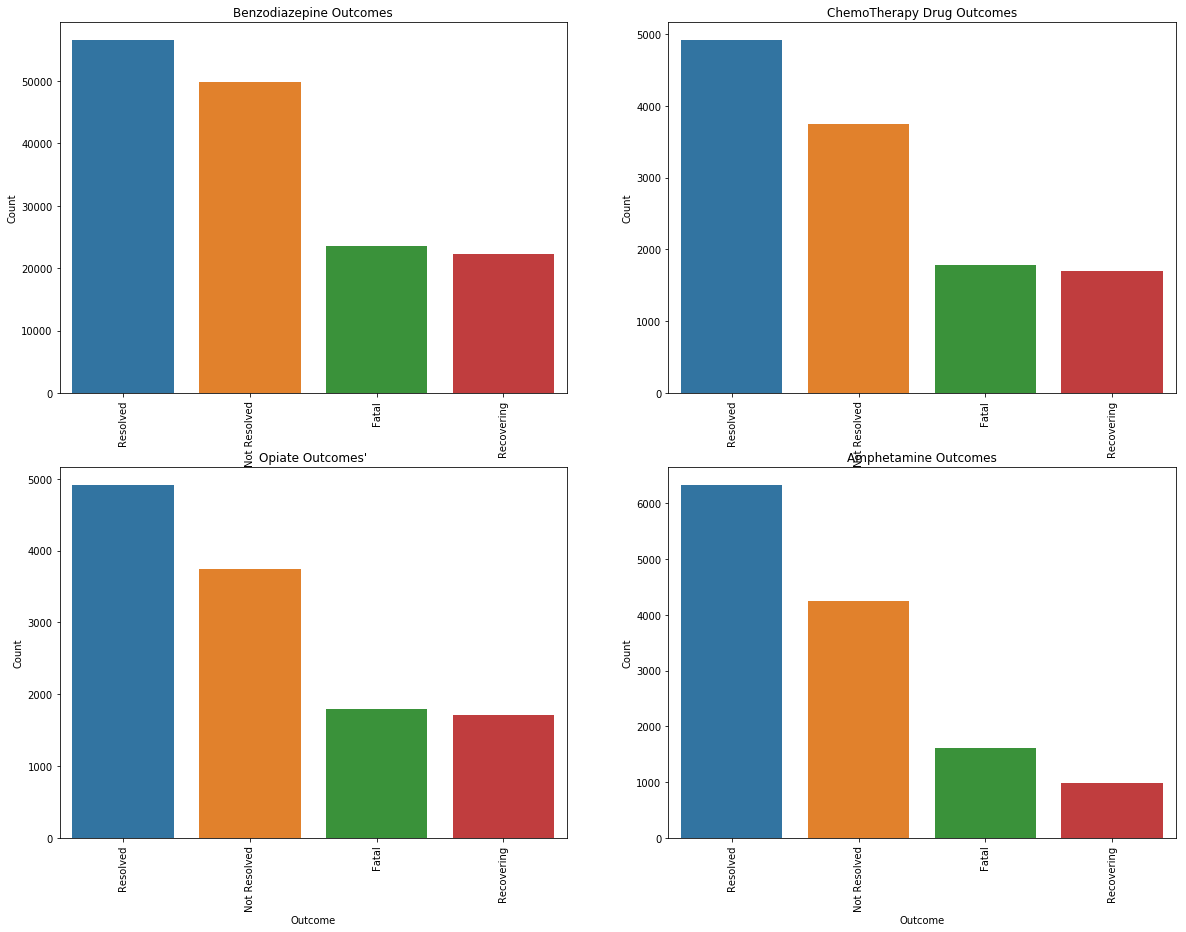

In [282]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (20,15))

ax1 = sns.barplot(x = 'Outcome',y='Count', data = benzoOutcome, ax = ax1)
ax1.set_xticklabels = ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set = ax1.set(title = "Benzodiazepine Outcomes")

ax2 = sns.barplot(x = 'Outcome',y='Count', data = chemoOutcome, ax = ax2)
ax2.set_xticklabels = ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set = ax2.set(title = "ChemoTherapy Drug Outcomes")

ax3 = sns.barplot(x = 'Outcome',y='Count', data = opiateOutcome, ax = ax3)
ax3.set_xticklabels = ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax3.set = ax3.set(title = "Opiate Outcomes'")
                  
ax4 = sns.barplot(x = 'Outcome',y='Count', data = amphOutcome, ax = ax4)
ax4.set_xticklabels = ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
ax4.set = ax4.set(title = "Amphetamine Outcomes")
                  
                  

The above barcharts display the most breakdown of outcomes for the above four drug classes. The most fatal drug class is easily the benzo class. Chemotherapy drugs were also quite fatal relative to the total amount of occurances returned in the database. Although the sample sizes vary across the four classes, we can compare them succesfully by comparing the relative size of each barplot. Amphetamines proved to be the least fatal of the four, with the most resolved cases.